# Import Module and Data

In [ ]:
!pip install wordcloud matplotlib
!pip install nlp-id
!pip install langdetect

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.6/402.6 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 50.6 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=bb51149c16832fcb90cd1c721883d3260a9500c60c404d0addb4a19fca742939
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
  Attempting uninstall: huggingface-hub
    Found e

In [ ]:
# Import standard libraries
from collections import Counter
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Impor pustaka untuk analisis statistik
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import plotly.express as px

# Setel opsi tampilan pandas
pd.set_option('display.max_colwidth', None)

# Impor pustaka untuk pra-pemrosesan data dan analisis
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE, KMeansSMOTE
from imblearn.metrics import classification_report_imbalanced

# Impor pustaka untuk model machine learning
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# Impor pustaka untuk pemrosesan teks
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nlp_id.lemmatizer import Lemmatizer
import string

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

# Impor pustaka untuk visualisasi
import plotly.express as px
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
# Import Data
!gdown 1voW7R8ZrsqqMK_iEj2aZsznkSTemAZui
# https://drive.google.com/file/d/1voW7R8ZrsqqMK_iEj2aZsznkSTemAZui/view?usp=drive_link
df = pd.read_csv('/content/mobil_listrik.csv')

Downloading...
From: https://drive.google.com/uc?id=1voW7R8ZrsqqMK_iEj2aZsznkSTemAZui
To: /content/mobil_listrik.csv
100% 266k/266k [00:00<00:00, 93.0MB/s]


# Data Understanding

In [ ]:
df.head()

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio insya alloh laris manis,positif
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinaikin usaha gitu cari cuan subsidi sebab inflasi paling gede,negatif
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor motor pabrikan jepang,positif
3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif
4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya rumah blom jd umkm bukan serta kur dapet ngaco sia deui sia deui nu narima subsidi teh ari aing iraha,negatif


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_komentar    1517 non-null   object
 1   nama_akun      1516 non-null   object
 2   tanggal        1517 non-null   object
 3   text_cleaning  1515 non-null   object
 4   sentimen       1517 non-null   object
dtypes: object(5)
memory usage: 59.4+ KB


Tipe data tanggal tidak sesuai. Akan diubah menjadi datetime (di bagian preparation)

In [ ]:
df.describe()

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen
count,1517,1516,1517,1515,1517
unique,1517,1515,1514,1514,3
top,Ugzbll5eyrIy3-gdUUJ4AaABAg,Albert,2023-06-06 14:02:09+00:00,mahal,negatif
freq,1,2,2,2,869


Beberapa hal yang perlu diperhatikan:


1.   Terdapat missing value pada kolom nama_akun dan text_cleaning
2.   Terdapat 2 komentar dari nama_akun Albert

# Data Preparation

## Drop kolom 'id_komentar'

In [ ]:
df = df.drop(columns=['id_komentar'])

## Koreksi Tipe Data

In [ ]:
# Ubah tipe data kolom 'tanggal' dari object ke datetime

# Mengubah tipe data 'tanggal' menjadi datetime
df['tanggal'] = pd.to_datetime(df['tanggal'])

# Mengecek kembali tipe data kolom
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   nama_akun      1516 non-null   object             
 1   tanggal        1517 non-null   datetime64[ns, UTC]
 2   text_cleaning  1515 non-null   object             
 3   sentimen       1517 non-null   object             
dtypes: datetime64[ns, UTC](1), object(3)
memory usage: 47.5+ KB
None


In [ ]:
df.describe()

,nama_akun,tanggal,text_cleaning,sentimen
count,1516,1517,1515,1517
unique,1515,NaN,1514,3
top,Albert,NaN,mahal,negatif
freq,2,NaN,2,869
mean,NaN,2023-06-01 11:49:34.269611008+00:00,NaN,NaN
min,NaN,2022-09-19 11:41:32+00:00,NaN,NaN
25%,NaN,2023-06-06 18:41:35+00:00,NaN,NaN
50%,NaN,2023-06-07 10:15:29+00:00,NaN,NaN
75%,NaN,2023-06-12 04:11:13+00:00,NaN,NaN
max,NaN,2023-08-06 12:54:49+00:00,NaN,NaN


## Deteksi Duplikasi

In [ ]:
duplicates1 = df.duplicated()
num_duplicates1 = duplicates1.sum()
print(f'Jumlah duplikasi dari dataset df: {num_duplicates1}')

Jumlah duplikasi dari dataset df: 0


Tidak ada duplikasi pada data

## Deteksi Anomali

In [ ]:
# Value unik pada setiap kolom
for i in df.columns:
  print(f'Kolom {i}')
  print(df[i].unique())
  print('')

Kolom nama_akun
['Sqn Ldr' 'lushen ace' 'Fatih Al-Ayyubi' ... 'Mikhanalont Horassss'
 'ANI ANI SOFIE' 'La Bold']

Kolom tanggal
<DatetimeArray>
['2023-08-06 12:54:49+00:00', '2023-08-04 12:16:23+00:00',
 '2023-08-04 10:17:57+00:00', '2023-08-04 08:29:54+00:00',
 '2023-08-04 07:55:37+00:00', '2023-08-04 06:58:17+00:00',
 '2023-08-04 06:31:56+00:00', '2023-08-04 01:04:18+00:00',
 '2023-08-03 23:56:55+00:00', '2023-08-03 11:25:57+00:00',
 ...
 '2022-09-22 22:25:44+00:00', '2022-09-20 15:20:27+00:00',
 '2022-09-20 05:14:22+00:00', '2022-09-19 15:53:07+00:00',
 '2022-09-19 14:47:02+00:00', '2022-09-19 12:30:44+00:00',
 '2022-09-19 12:27:18+00:00', '2022-09-19 12:23:06+00:00',
 '2022-09-19 11:48:39+00:00', '2022-09-19 11:41:32+00:00']
Length: 1514, dtype: datetime64[ns, UTC]

Kolom text_cleaning
['saran sih bikin   harga ionic sama kayak brio insya alloh laris manis'
 'problem subsidi kualitas diturunin harga dinaikin usaha gitu cari cuan subsidi sebab inflasi paling gede'
 'baik kualitas ke

In [ ]:
# Mengecek zona waktu pada kolom 'tanggal'
timezone_info = df['tanggal'].dt.tz

# Menampilkan informasi zona waktu
print("Zona waktu pada kolom 'tanggal':", timezone_info)

Zona waktu pada kolom 'tanggal': UTC


Belum ditemukan anomali.

## Missing Value

In [ ]:
df.isnull().mean() * 100

,0
nama_akun,0.065920
tanggal,0.000000
text_cleaning,0.131839
sentimen,0.000000


In [ ]:
# Menampilkan baris yang memiliki missing value
missing_value_rows = df[df.isna().any(axis=1)]

# Menampilkan hasilnya
missing_value_rows

,nama_akun,tanggal,text_cleaning,sentimen
1422,Jansen Gunawan,2023-03-16 04:17:35+00:00,NaN,netral
1423,Hidayati Christen,2023-03-16 03:42:02+00:00,NaN,netral
1509,NaN,2022-09-20 05:14:22+00:00,mantap fasilitas beri perintah beli ev dp putus plat khusus bebas ganjil genap moga segera transformasi kendara ev lebih cepat,negatif


In [ ]:
# Ide mengatasi missing value: mengisi nilai NaN dengan empty string (yakni ' ')
df.fillna(' ', inplace=True)
df.isnull().mean() * 100

,0
nama_akun,0.0
tanggal,0.0
text_cleaning,0.0
sentimen,0.0


Missing value clear.

## Penambahan Var: tanggal_var, jam_var, utc_var

In [ ]:
# Membuat variabel baru 'tanggal_var' untuk menyimpan informasi tanggal
df['tanggal_var'] = df['tanggal'].dt.date

# Membuat variabel baru 'jam_var' untuk menyimpan informasi jam
df['jam_var'] = df['tanggal'].dt.time

# Membuat variabel baru 'utc_var' untuk menyimpan informasi UTC
df['utc_var'] = df['tanggal'].dt.tz

# Menampilkan hasilnya
df[['tanggal', 'tanggal_var', 'jam_var', 'utc_var']].head()

,tanggal,tanggal_var,jam_var,utc_var
0,2023-08-06 12:54:49+00:00,2023-08-06,12:54:49,UTC
1,2023-08-04 12:16:23+00:00,2023-08-04,12:16:23,UTC
2,2023-08-04 10:17:57+00:00,2023-08-04,10:17:57,UTC
3,2023-08-04 08:29:54+00:00,2023-08-04,08:29:54,UTC
4,2023-08-04 07:55:37+00:00,2023-08-04,07:55:37,UTC


## Preprocessing text: kolom text_cleaning

NOTE: Setelah diperhatikan data dalam bahasa Indonesia dan sedikit dalam bahasa Sunda. Kami akan melakukan prepro dalam bahasa Indonesia karena data dalam bahasa Sunda sangat sedikit.

### Basic Preprocessing (output: text_cleaning1)

In [ ]:
def pre_token(doc):
    # Case folding
    doc = doc.lower()

    # Punctuation & Digit Removal
    doc = doc.translate(str.maketrans('', '', string.punctuation + string.digits))

    # Whitespace Removal
    doc = doc.strip()

    # Mengembalikan teks yang telah diproses
    return doc

# Terapkan fungsi pre_token ke df['text_cleaning'] dan simpan hasilnya ke kolom baru 'text_cleaning1'
df['text_cleaning1'] = df['text_cleaning'].apply(pre_token)

In [ ]:
# Menampilkan baris di mana isi kolom 'text_cleaning' dan 'text_cleaning1' berbeda
df[df['text_cleaning'] != df['text_cleaning1']]

,nama_akun,tanggal,text_cleaning,sentimen,tanggal_var,jam_var,utc_var,text_cleaning1
10,Rendy Ramadhan,2023-08-03 07:20:29+00:00,tepat sasar donk syarat belum tepat subsidi kurang besar jd warga kurang mampu pikir beli anda subsidi jt mungkin warga kurang mampu lebih berani beli,negatif,2023-08-03,07:20:29,UTC,tepat sasar donk syarat belum tepat subsidi kurang besar jd warga kurang mampu pikir beli anda subsidi jt mungkin warga kurang mampu lebih berani beli
15,pemburu dolar,2023-07-29 08:54:25+00:00,tahan th,negatif,2023-07-29,08:54:25,UTC,tahan th
18,denis sined,2023-07-28 14:55:46+00:00,buat hari sih sangat guna jalan jauh sih mikir pake charging station keluar kota saudara kota buat charge banyak stasiun chrargenya jg kaya bensin tinggal isi beberapa menit langsung jalan butuh waktu sebentar kritis banget mungkin nyolokin minimarket or rumah orang,negatif,2023-07-28,14:55:46,UTC,buat hari sih sangat guna jalan jauh sih mikir pake charging station keluar kota saudara kota buat charge banyak stasiun chrargenya jg kaya bensin tinggal isi beberapa menit langsung jalan butuh waktu sebentar kritis banget mungkin nyolokin minimarket or rumah orang
35,yudhi mypras,2023-07-09 22:51:21+00:00,masyarakat ingin harga jual batre murah baru mau beli,positif,2023-07-09,22:51:21,UTC,masyarakat ingin harga jual batre murah baru mau beli
36,Putra Perdana,2023-07-09 09:53:45+00:00,aneh banget subsidi kendara pribadi pake anggar negara bayar usaha malah dorong program ada ev buat jabat ngasih duit buat kkn proyek ada ev jabat punya saham usaha sembari dapet baru pake anggar negara dapat ras duit pajak masyarakat kecil padahal transportasi publik sendiri pada cuman jakarta kota kota bantu dorong kembang layan transportasi publik rata nih padahal ahli kota nyata bijak solid transportasi publik turun macet hingga efisiensi sistem gera kota lebih tepat waktu kendara jalan lebih efisien warga kecil nikmat akhir gera ekonomi lebih lancar akibat lain kurang polusi fasilitas dukung transport publik tingkat trotoar lebar lahan pkl rapi toko pinggir jalan hidup dl masyarakat kecil lebih banyak sempat buka usaha jalan banyak lalu transportasi publik sebab semua susah jadi paragraf,negatif,2023-07-09,09:53:45,UTC,aneh banget subsidi kendara pribadi pake anggar negara bayar usaha malah dorong program ada ev buat jabat ngasih duit buat kkn proyek ada ev jabat punya saham usaha sembari dapet baru pake anggar negara dapat ras duit pajak masyarakat kecil padahal transportasi publik sendiri pada cuman jakarta kota kota bantu dorong kembang layan transportasi publik rata nih padahal ahli kota nyata bijak solid transportasi publik turun macet hingga efisiensi sistem gera kota lebih tepat waktu kendara jalan lebih efisien warga kecil nikmat akhir gera ekonomi lebih lancar akibat lain kurang polusi fasilitas dukung transport publik tingkat trotoar lebar lahan pkl rapi toko pinggir jalan hidup dl masyarakat kecil lebih banyak sempat buka usaha jalan banyak lalu transportasi publik sebab semua susah jadi paragraf
...,...,...,...,...,...,...,...,...
1493,kang shodik sport,2022-12-18 07:00:00+00:00,biar beli tak pakek sendiri,negatif,2022-12-18,07:00:00,UTC,biar beli tak pakek sendiri
1499,Faris Rahman,2022-12-16 21:27:39+00:00,pny rata otomotif bnyk duit tau sya isi listrikny jga blom desa tempat tentu tuju dg paksa banget pdhal semua bom siap,negatif,2022-12-16,21:27:39,UTC,pny rata otomotif bnyk duit tau sya isi listrikny jga blom desa tempat tentu tuju dg paksa banget pdhal semua bom siap
1510,rizky adhi pradana,2022-09-19 15:53:07+00:00,ingat kerja sama sama musk pertama ketemu tangan dlu bisnis mungkin tuju,positif,2022-09-19,15:53:07,UTC,ingat kerja sama sama musk pertama ketemu tangan dlu bisnis mungkin tuju
1513,Elias Panai,2022-09-19 12:27:18+00:00,antar anak sekolah antar bantu pasar klw jauh klw jebak macet abis dorong pulang,negatif,2022-09-19,12:27:18,UTC,antar anak sekolah antar bantu pasar klw jauh klw jebak macet abis dorong pulang


### Text Normalizarion/Noise Removal (output: text_cleaning2)

In [ ]:
# Memuat kamus slang Indonesia
indo_slang_word = pd.read_csv("https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv")

def replace_slang_word(doc, slang_word):
    words = word_tokenize(doc)
    for index in range(len(words)):
        index_slang = slang_word.slang == words[index]
        formal = list(set(slang_word[index_slang].formal))
        if len(formal) == 1:
            words[index] = formal[0]
    return ' '.join(words)

# Terapkan fungsi replace_slang_word ke df['text_cleaning1'] dan simpan hasilnya ke kolom baru 'text_cleaning2'
df['text_cleaning2'] = df['text_cleaning1'].apply(lambda x: replace_slang_word(x, indo_slang_word))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Menampilkan baris di mana isi kolom 'text_cleaning1' dan 'text_cleaning2' berbeda
df[df['text_cleaning1'] != df['text_cleaning2']]

,nama_akun,tanggal,text_cleaning,sentimen,tanggal_var,jam_var,utc_var,text_cleaning1,text_cleaning2
0,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio insya alloh laris manis,positif,2023-08-06,12:54:49,UTC,saran sih bikin harga ionic sama kayak brio insya alloh laris manis,saran sih bikin harga ionic sama kayak brio insya allah laris manis
1,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinaikin usaha gitu cari cuan subsidi sebab inflasi paling gede,negatif,2023-08-04,12:16:23,UTC,problem subsidi kualitas diturunin harga dinaikin usaha gitu cari cuan subsidi sebab inflasi paling gede,problem subsidi kualitas diturunin harga dinaikin usaha begitu cari cuan subsidi sebab inflasi paling gede
4,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya rumah blom jd umkm bukan serta kur dapet ngaco sia deui sia deui nu narima subsidi teh ari aing iraha,negatif,2023-08-04,07:55:37,UTC,syarat ngaco woy anak muda blom punya rumah blom jd umkm bukan serta kur dapet ngaco sia deui sia deui nu narima subsidi teh ari aing iraha,syarat mengaco woy anak muda belum punya rumah belum jadi umkm bukan serta kur dapat mengaco sia deui sia deui nu narima subsidi teh ari aing iraha
6,BajuMax,2023-08-04 06:31:56+00:00,mol keren yah berita plus padahal mol lokal merk batrenya juta garansi tahun anggap batre awet tahun rakyat indonesia per tahun sekali keluar juta buat beli batre baru o saran uang subsidi keluar buat batre perintah punya wewenang pertamina kelola contoh gas kg gas kg gas kg produk baru misal batre v batre v batre v cabut bayar pasang gas pnp pom sistem swap batre banyak titik swap point indonesia luas,negatif,2023-08-04,06:31:56,UTC,mol keren yah berita plus padahal mol lokal merk batrenya juta garansi tahun anggap batre awet tahun rakyat indonesia per tahun sekali keluar juta buat beli batre baru o saran uang subsidi keluar buat batre perintah punya wewenang pertamina kelola contoh gas kg gas kg gas kg produk baru misal batre v batre v batre v cabut bayar pasang gas pnp pom sistem swap batre banyak titik swap point indonesia luas,mol keren ya berita plus padahal mol lokal merk batrenya juta garansi tahun anggap batre awet tahun rakyat indonesia per tahun sekali keluar juta buat beli batre baru o saran uang subsidi keluar buat batre perintah punya wewenang pertamina kelola contoh gas kg gas kg gas kg produk baru misal batre v batre v batre v cabut bayar pasang gas pnp pom sistem swap batre banyak titik swap point indonesia luas
8,Heru Prasetyo,2023-08-03 23:56:55+00:00,subsidi tepat sasar,netral,2023-08-03,23:56:55,UTC,subsidi tepat sasar,subsidi tepat sasar
...,...,...,...,...,...,...,...,...,...
1510,rizky adhi pradana,2022-09-19 15:53:07+00:00,ingat kerja sama sama musk pertama ketemu tangan dlu bisnis mungkin tuju,positif,2022-09-19,15:53:07,UTC,ingat kerja sama sama musk pertama ketemu tangan dlu bisnis mungkin tuju,ingat kerja sama sama musk pertama ketemu tangan dulu bisnis mungkin tuju
1512,Fish aquspace,2022-09-19 12:30:44+00:00,apa kabar padahal negri luar biasa dapat negara,negatif,2022-09-19,12:30:44,UTC,apa kabar padahal negri luar biasa dapat negara,apa kabar padahal negeri luar biasa dapat negara
1513,Elias Panai,2022-09-19 12:27:18+00:00,antar anak sekolah antar bantu pasar klw jauh klw jebak macet abis dorong pulang,negatif,2022-09-19,12:27:18,UTC,antar anak sekolah antar bantu pasar klw jauh klw jebak macet abis dorong pulang,antar anak sekolah antar bantu pasar kalau jauh kalau jebak macet habis dorong pulang
1515,ANI ANI SOFIE,2022-09-19 11:48:39+00:00,cerdas orang hny dn pasar itu jln x blom da gimana kota ngecas jam br harga nih bbm naikin,netral,2022-09-19,11:48:39,UTC,cerdas orang hny dn pasar itu jln x blom da gimana kota ngecas jam br harga nih bbm naikin,cerdas orang hanya dan pasar itu jalan kali belum da bagaimana kota ngecas jam baru harga nih bbm naikin


### Menghapus Stopwords (output: text_cleaning3)

In [ ]:
# Mengambil daftar stopwords bahasa Indonesia
indo_stopwords = stopwords.words('indonesian')

def stopwords_removal(text, stop_words):
    # Tokenisasi teks
    words = word_tokenize(text)

    # Menghapus stopwords
    filtered_words = [word for word in words if word not in stop_words]

    # Menggabungkan kembali kata-kata yang tersisa menjadi sebuah teks
    return ' '.join(filtered_words)

# Terapkan fungsi stopwords_removal ke df['text_cleaning1'] dan simpan hasilnya ke kolom baru 'text_cleaning2'
df['text_cleaning3'] = df['text_cleaning2'].apply(lambda x: stopwords_removal(x, indo_stopwords))

In [ ]:
# Menampilkan baris di mana isi kolom 'text_cleaning2' dan 'text_cleaning3' berbeda
df[df['text_cleaning2'] != df['text_cleaning3']]

,nama_akun,tanggal,text_cleaning,sentimen,tanggal_var,jam_var,utc_var,text_cleaning1,text_cleaning2,text_cleaning3
0,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio insya alloh laris manis,positif,2023-08-06,12:54:49,UTC,saran sih bikin harga ionic sama kayak brio insya alloh laris manis,saran sih bikin harga ionic sama kayak brio insya allah laris manis,saran sih bikin harga ionic kayak brio insya allah laris manis
1,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinaikin usaha gitu cari cuan subsidi sebab inflasi paling gede,negatif,2023-08-04,12:16:23,UTC,problem subsidi kualitas diturunin harga dinaikin usaha gitu cari cuan subsidi sebab inflasi paling gede,problem subsidi kualitas diturunin harga dinaikin usaha begitu cari cuan subsidi sebab inflasi paling gede,problem subsidi kualitas diturunin harga dinaikin usaha cari cuan subsidi inflasi gede
2,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor motor pabrikan jepang,positif,2023-08-04,10:17:57,UTC,baik kualitas kembang dulu baik kualitas motor motor pabrikan jepang,baik kualitas kembang dulu baik kualitas motor motor pabrikan jepang,kualitas kembang kualitas motor motor pabrikan jepang
4,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya rumah blom jd umkm bukan serta kur dapet ngaco sia deui sia deui nu narima subsidi teh ari aing iraha,negatif,2023-08-04,07:55:37,UTC,syarat ngaco woy anak muda blom punya rumah blom jd umkm bukan serta kur dapet ngaco sia deui sia deui nu narima subsidi teh ari aing iraha,syarat mengaco woy anak muda belum punya rumah belum jadi umkm bukan serta kur dapat mengaco sia deui sia deui nu narima subsidi teh ari aing iraha,syarat mengaco woy anak muda rumah umkm kur mengaco sia deui sia deui nu narima subsidi teh ari aing iraha
5,Syarif Airlangga,2023-08-04 06:58:17+00:00,harga motor mahal masa harga mirip motor beat kualitas bagai langit bumi,positif,2023-08-04,06:58:17,UTC,harga motor mahal masa harga mirip motor beat kualitas bagai langit bumi,harga motor mahal masa harga mirip motor beat kualitas bagai langit bumi,harga motor mahal harga motor beat kualitas langit bumi
...,...,...,...,...,...,...,...,...,...,...
1510,rizky adhi pradana,2022-09-19 15:53:07+00:00,ingat kerja sama sama musk pertama ketemu tangan dlu bisnis mungkin tuju,positif,2022-09-19,15:53:07,UTC,ingat kerja sama sama musk pertama ketemu tangan dlu bisnis mungkin tuju,ingat kerja sama sama musk pertama ketemu tangan dulu bisnis mungkin tuju,kerja musk ketemu tangan bisnis tuju
1512,Fish aquspace,2022-09-19 12:30:44+00:00,apa kabar padahal negri luar biasa dapat negara,negatif,2022-09-19,12:30:44,UTC,apa kabar padahal negri luar biasa dapat negara,apa kabar padahal negeri luar biasa dapat negara,kabar negeri negara
1513,Elias Panai,2022-09-19 12:27:18+00:00,antar anak sekolah antar bantu pasar klw jauh klw jebak macet abis dorong pulang,negatif,2022-09-19,12:27:18,UTC,antar anak sekolah antar bantu pasar klw jauh klw jebak macet abis dorong pulang,antar anak sekolah antar bantu pasar kalau jauh kalau jebak macet habis dorong pulang,anak sekolah bantu pasar jebak macet habis dorong pulang
1515,ANI ANI SOFIE,2022-09-19 11:48:39+00:00,cerdas orang hny dn pasar itu jln x blom da gimana kota ngecas jam br harga nih bbm naikin,netral,2022-09-19,11:48:39,UTC,cerdas orang hny dn pasar itu jln x blom da gimana kota ngecas jam br harga nih bbm naikin,cerdas orang hanya dan pasar itu jalan kali belum da bagaimana kota ngecas jam baru harga nih bbm naikin,cerdas orang pasar jalan kali da kota ngecas jam harga nih bbm naikin


### Lemmatization (output: text_cleaning2_lem)

NOTE: Lemmatisasi akan dilakukan pada kolom text_cleaning2. Tidak dilakukan pada text_cleaning3 karena kolom merupakan hasil menghapus stopwords yang dinilai dapat menghapus konteks informasi dari text.

In [ ]:
# Inisialisasi lemmatizer
lemmatizer = Lemmatizer()

def lemmatize_text(text):
    # Tokenisasi teks
    tokens = word_tokenize(text)

    # Lematisasi setiap token
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Menggabungkan kembali token yang telah dilematiskan menjadi teks
    return ' '.join(lemmatized_tokens)

# Terapkan fungsi lemmatize_text ke df['text_cleaning2'] dan simpan hasilnya ke kolom baru 'text_cleaning2_lem'
df['text_cleaning2_lem'] = df['text_cleaning2'].apply(lemmatize_text)

In [ ]:
# Menampilkan baris di mana isi kolom 'text_cleaning2' dan 'text_cleaning2_lem' berbeda
df[df['text_cleaning2'] != df['text_cleaning2_lem']]

,nama_akun,tanggal,text_cleaning,sentimen,tanggal_var,jam_var,utc_var,text_cleaning1,text_cleaning2,text_cleaning3,text_cleaning2_lem
4,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya rumah blom jd umkm bukan serta kur dapet ngaco sia deui sia deui nu narima subsidi teh ari aing iraha,negatif,2023-08-04,07:55:37,UTC,syarat ngaco woy anak muda blom punya rumah blom jd umkm bukan serta kur dapet ngaco sia deui sia deui nu narima subsidi teh ari aing iraha,syarat mengaco woy anak muda belum punya rumah belum jadi umkm bukan serta kur dapat mengaco sia deui sia deui nu narima subsidi teh ari aing iraha,syarat mengaco woy anak muda rumah umkm kur mengaco sia deui sia deui nu narima subsidi teh ari aing iraha,syarat aco woy anak muda belum punya rumah belum jadi umkm bukan serta kur dapat aco sia deui sia deui nu narima subsidi teh ari aing iraha
6,BajuMax,2023-08-04 06:31:56+00:00,mol keren yah berita plus padahal mol lokal merk batrenya juta garansi tahun anggap batre awet tahun rakyat indonesia per tahun sekali keluar juta buat beli batre baru o saran uang subsidi keluar buat batre perintah punya wewenang pertamina kelola contoh gas kg gas kg gas kg produk baru misal batre v batre v batre v cabut bayar pasang gas pnp pom sistem swap batre banyak titik swap point indonesia luas,negatif,2023-08-04,06:31:56,UTC,mol keren yah berita plus padahal mol lokal merk batrenya juta garansi tahun anggap batre awet tahun rakyat indonesia per tahun sekali keluar juta buat beli batre baru o saran uang subsidi keluar buat batre perintah punya wewenang pertamina kelola contoh gas kg gas kg gas kg produk baru misal batre v batre v batre v cabut bayar pasang gas pnp pom sistem swap batre banyak titik swap point indonesia luas,mol keren ya berita plus padahal mol lokal merk batrenya juta garansi tahun anggap batre awet tahun rakyat indonesia per tahun sekali keluar juta buat beli batre baru o saran uang subsidi keluar buat batre perintah punya wewenang pertamina kelola contoh gas kg gas kg gas kg produk baru misal batre v batre v batre v cabut bayar pasang gas pnp pom sistem swap batre banyak titik swap point indonesia luas,mol keren ya berita plus mol lokal merk batrenya juta garansi anggap batre awet rakyat indonesia juta beli batre o saran uang subsidi batre perintah wewenang pertamina kelola contoh gas kg gas kg gas kg produk batre v batre v batre v cabut bayar pasang gas pnp pom sistem swap batre titik swap point indonesia luas,mol keren ya berita plus padahal mol lokal merk batrenya juta garansi tahun anggap batre awet tahun rakyat indonesia per tahun sekali keluar juta buat beli batre baru o saran uang subsidi keluar buat batre perintah punya wenang pertamina kelola contoh gas kg gas kg gas kg produk baru misal batre v batre v batre v cabut bayar pasang gas pnp pom sistem swap batre banyak titik swap point indonesia luas
21,pelaut tradisional,2023-07-22 13:36:57+00:00,apa sieh kok mbulet asli yo tiap spbu seluruh indonesia tempat nge charge wes laku orng mau beli knp milih konvensional keluar kota khawatir mau ngecarger wong semua tempat sedia masak keluar daerah pulang ditowing lucu,negatif,2023-07-22,13:36:57,UTC,apa sieh kok mbulet asli yo tiap spbu seluruh indonesia tempat nge charge wes laku orng mau beli knp milih konvensional keluar kota khawatir mau ngecarger wong semua tempat sedia masak keluar daerah pulang ditowing lucu,apa sieh kok mbulet asli ya tiap spbu seluruh indonesia tempat nge charge wes laku orang mau beli kenapa memilih konvensional keluar kota khawatir mau ngecarger wong semua tempat sedia masak keluar daerah pulang ditowing lucu,sieh mbulet asli ya spbu indonesia nge charge wes laku orang beli memilih konvensional kota khawatir ngecarger sedia masak daerah pulang ditowing lucu,apa sieh kok mbulet asli ya tiap spbu seluruh indonesia tempat nge charge wes laku orang mau beli kenapa pilih konvensional keluar kota khawatir mau ngecarger wong semua tempat sedia masak keluar daerah pulang ditowin

### Lemmatization (output: text_cleaning3_lem) [UNTUK EDA]

In [ ]:
# Inisialisasi lemmatizer
lemmatizer = Lemmatizer()

def lemmatize_text(text):
    # Tokenisasi teks
    tokens = word_tokenize(text)

    # Lematisasi setiap token
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Menggabungkan kembali token yang telah dilematiskan menjadi teks
    return ' '.join(lemmatized_tokens)

# Terapkan fungsi lemmatize_text ke df['text_cleaning2'] dan simpan hasilnya ke kolom baru 'text_cleaning2_lem'
df['text_cleaning3_lem'] = df['text_cleaning3'].apply(lemmatize_text)

In [ ]:
# Menampilkan baris di mana isi kolom 'text_cleaning3' dan 'text_cleaning3_lem' berbeda
df[df['text_cleaning3'] != df['text_cleaning3_lem']]

,nama_akun,tanggal,text_cleaning,sentimen,tanggal_var,jam_var,utc_var,text_cleaning1,text_cleaning2,text_cleaning3,text_cleaning2_lem,text_cleaning3_lem
4,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya rumah blom jd umkm bukan serta kur dapet ngaco sia deui sia deui nu narima subsidi teh ari aing iraha,negatif,2023-08-04,07:55:37,UTC,syarat ngaco woy anak muda blom punya rumah blom jd umkm bukan serta kur dapet ngaco sia deui sia deui nu narima subsidi teh ari aing iraha,syarat mengaco woy anak muda belum punya rumah belum jadi umkm bukan serta kur dapat mengaco sia deui sia deui nu narima subsidi teh ari aing iraha,syarat mengaco woy anak muda rumah umkm kur mengaco sia deui sia deui nu narima subsidi teh ari aing iraha,syarat aco woy anak muda belum punya rumah belum jadi umkm bukan serta kur dapat aco sia deui sia deui nu narima subsidi teh ari aing iraha,syarat aco woy anak muda rumah umkm kur aco sia deui sia deui nu narima subsidi teh ari aing iraha
6,BajuMax,2023-08-04 06:31:56+00:00,mol keren yah berita plus padahal mol lokal merk batrenya juta garansi tahun anggap batre awet tahun rakyat indonesia per tahun sekali keluar juta buat beli batre baru o saran uang subsidi keluar buat batre perintah punya wewenang pertamina kelola contoh gas kg gas kg gas kg produk baru misal batre v batre v batre v cabut bayar pasang gas pnp pom sistem swap batre banyak titik swap point indonesia luas,negatif,2023-08-04,06:31:56,UTC,mol keren yah berita plus padahal mol lokal merk batrenya juta garansi tahun anggap batre awet tahun rakyat indonesia per tahun sekali keluar juta buat beli batre baru o saran uang subsidi keluar buat batre perintah punya wewenang pertamina kelola contoh gas kg gas kg gas kg produk baru misal batre v batre v batre v cabut bayar pasang gas pnp pom sistem swap batre banyak titik swap point indonesia luas,mol keren ya berita plus padahal mol lokal merk batrenya juta garansi tahun anggap batre awet tahun rakyat indonesia per tahun sekali keluar juta buat beli batre baru o saran uang subsidi keluar buat batre perintah punya wewenang pertamina kelola contoh gas kg gas kg gas kg produk baru misal batre v batre v batre v cabut bayar pasang gas pnp pom sistem swap batre banyak titik swap point indonesia luas,mol keren ya berita plus mol lokal merk batrenya juta garansi anggap batre awet rakyat indonesia juta beli batre o saran uang subsidi batre perintah wewenang pertamina kelola contoh gas kg gas kg gas kg produk batre v batre v batre v cabut bayar pasang gas pnp pom sistem swap batre titik swap point indonesia luas,mol keren ya berita plus padahal mol lokal merk batrenya juta garansi tahun anggap batre awet tahun rakyat indonesia per tahun sekali keluar juta buat beli batre baru o saran uang subsidi keluar buat batre perintah punya wenang pertamina kelola contoh gas kg gas kg gas kg produk baru misal batre v batre v batre v cabut bayar pasang gas pnp pom sistem swap batre banyak titik swap point indonesia luas,mol keren ya berita plus mol lokal merk batrenya juta garansi anggap batre awet rakyat indonesia juta beli batre o saran uang subsidi batre perintah wenang pertamina kelola contoh gas kg gas kg gas kg produk batre v batre v batre v cabut bayar pasang gas pnp pom sistem swap batre titik swap point indonesia luas
21,pelaut tradisional,2023-07-22 13:36:57+00:00,apa sieh kok mbulet asli yo tiap spbu seluruh indonesia tempat nge charge wes laku orng mau beli knp milih konvensional keluar kota khawatir mau ngecarger wong semua tempat sedia masak keluar daerah pulang ditowing lucu,negatif,2023-07-22,13:36:57,UTC,apa sieh kok mbulet asli yo tiap spbu seluruh indonesia tempat nge charge wes laku orng mau beli knp milih konvensional keluar kota khawatir mau ngecarger wong semua tempat sedia masak keluar daerah pulang ditowing lucu,apa sieh kok mbulet asli ya tiap spbu seluruh indonesia tempat nge charge wes laku orang mau beli kenapa memilih konvensional keluar kota khawatir mau ngecarger wo

## Transformasi Variabel Nonnumerik (Label Encoder): kolom sentiment

In [ ]:
df.sentimen.value_counts()

,count
sentimen,
negatif,869
positif,504
netral,144


Perhatikan bahwa data imbalance

In [ ]:
encoder = LabelEncoder()
df['sentimen_label_encoded'] = encoder.fit_transform(df['sentimen'])
df[['sentimen', 'sentimen_label_encoded']]

,sentimen,sentimen_label_encoded
0,positif,2
1,negatif,0
2,positif,2
3,negatif,0
4,negatif,0
...,...,...
1512,negatif,0
1513,negatif,0
1514,positif,2
1515,netral,1


Note:

1. negatif : 0
2. netral : 1
3. positif : 2

# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   nama_akun               1517 non-null   object             
 1   tanggal                 1517 non-null   datetime64[ns, UTC]
 2   text_cleaning           1517 non-null   object             
 3   sentimen                1517 non-null   object             
 4   tanggal_var             1517 non-null   object             
 5   jam_var                 1517 non-null   object             
 6   utc_var                 1517 non-null   object             
 7   text_cleaning1          1517 non-null   object             
 8   text_cleaning2          1517 non-null   object             
 9   text_cleaning3          1517 non-null   object             
 10  text_cleaning2_lem      1517 non-null   object             
 11  text_cleaning3_lem      1517 non-null   obj

## Sentimen apa yang paling sering muncul?

In [ ]:
df.sentimen.value_counts()

,count
sentimen,
negatif,869
positif,504
netral,144


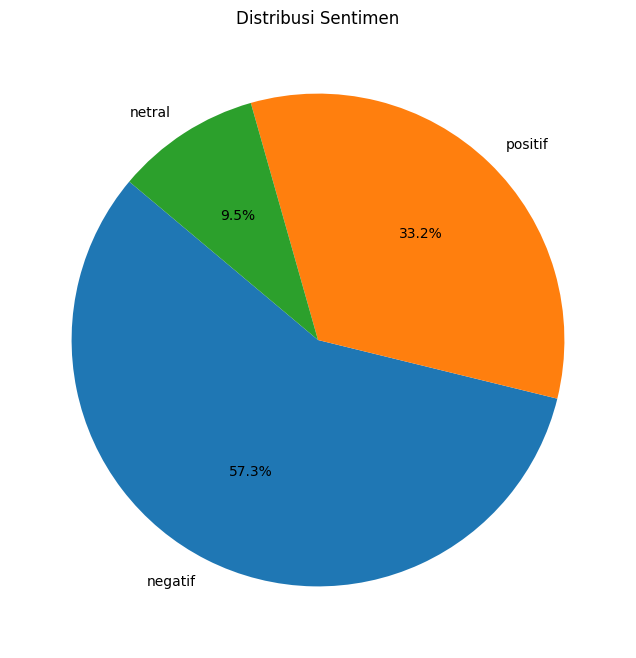

In [ ]:
# Menghitung frekuensi setiap kategori sentiment
sentiment_counts = df['sentimen'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Sentimen')
plt.show()

<ipython-input-64-10ae38cc90c9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


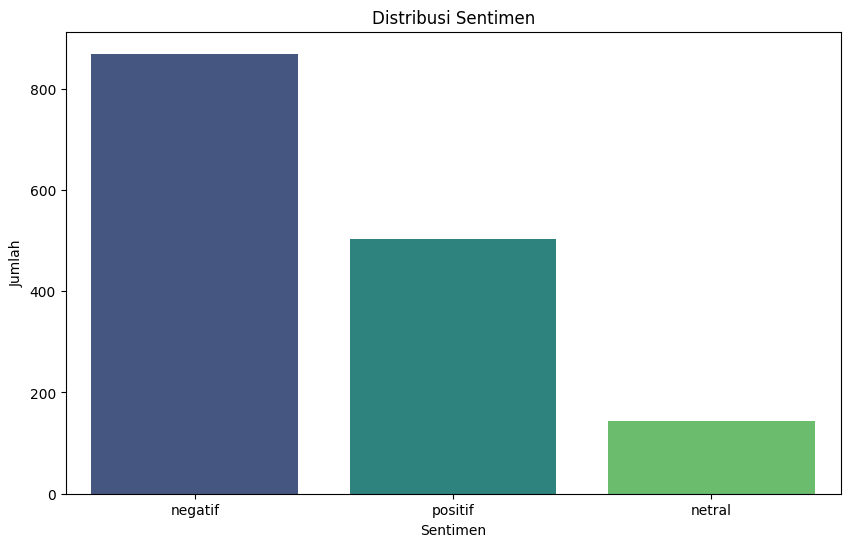

In [ ]:
# Menghitung frekuensi setiap kategori sentimen
sentiment_counts = df['sentimen'].value_counts()

# Membuat bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')

# Menambahkan label dan judul
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Distribusi Sentimen')

# Menampilkan plot
plt.show()


## Bagaimana volume data komentar seiring waktu secara umum?

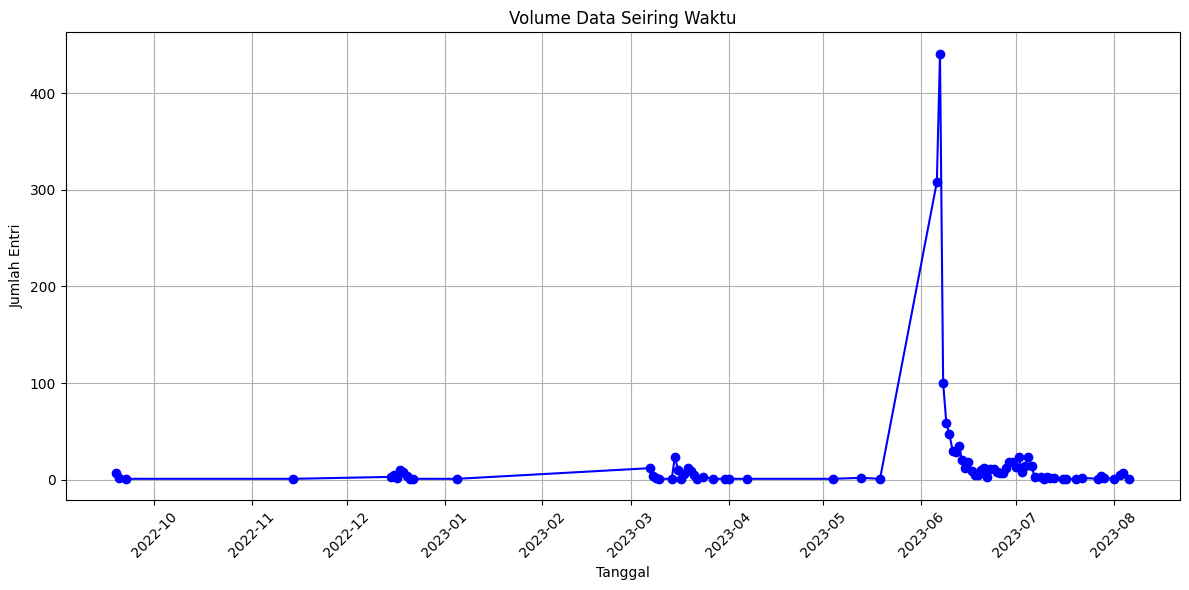

In [ ]:
# Mengelompokkan data berdasarkan tanggal dan menghitung jumlah entri per tanggal
date_counts = df['tanggal'].dt.date.value_counts().sort_index()

# Membuat line chart
plt.figure(figsize=(12, 6))
plt.plot(date_counts.index, date_counts.values, marker='o', linestyle='-', color='b')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Entri')
plt.title('Volume Data Seiring Waktu')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

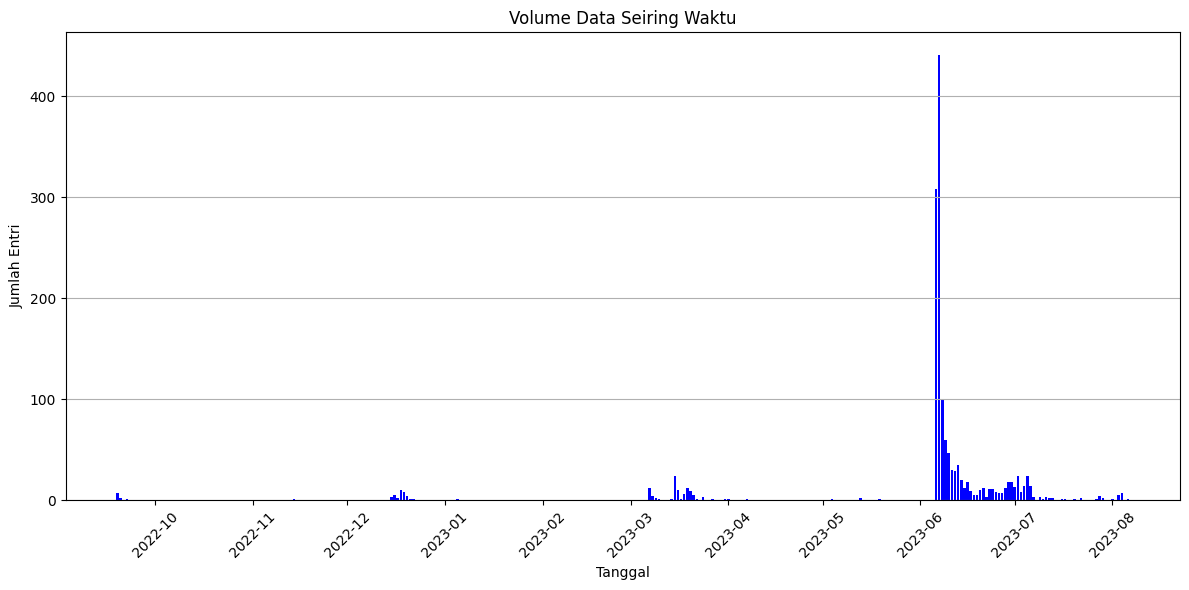

In [ ]:
# Mengelompokkan data berdasarkan tanggal dan menghitung jumlah entri per tanggal
date_counts = df['tanggal'].dt.date.value_counts().sort_index()

# Membuat bar chart
plt.figure(figsize=(12, 6))
plt.bar(date_counts.index, date_counts.values, color='b')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Entri')
plt.title('Volume Data Seiring Waktu')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Volume mengalami puncak sekitar bulan Juni 2023

In [ ]:
# Mengelompokkan data berdasarkan tanggal dan menghitung jumlah entri per tanggal
date_counts = df['tanggal'].dt.date.value_counts().sort_index()

# Print 10 hari dengan komentar paling banyak
top_15_days = date_counts.nlargest(15)
print("15 Hari dengan Komentar Paling Banyak:")
print(top_15_days)

15 Hari dengan Komentar Paling Banyak:
tanggal
2023-06-07    441
2023-06-06    308
2023-06-08    100
2023-06-09     59
2023-06-10     47
2023-06-13     35
2023-06-11     30
2023-06-12     29
2023-03-15     24
2023-07-02     24
2023-07-05     24
2023-06-14     20
2023-06-16     18
2023-06-29     18
2023-06-30     18
Name: count, dtype: int64


## Bagaimana volume data seiring waktu pada tiap jenis sentimen?

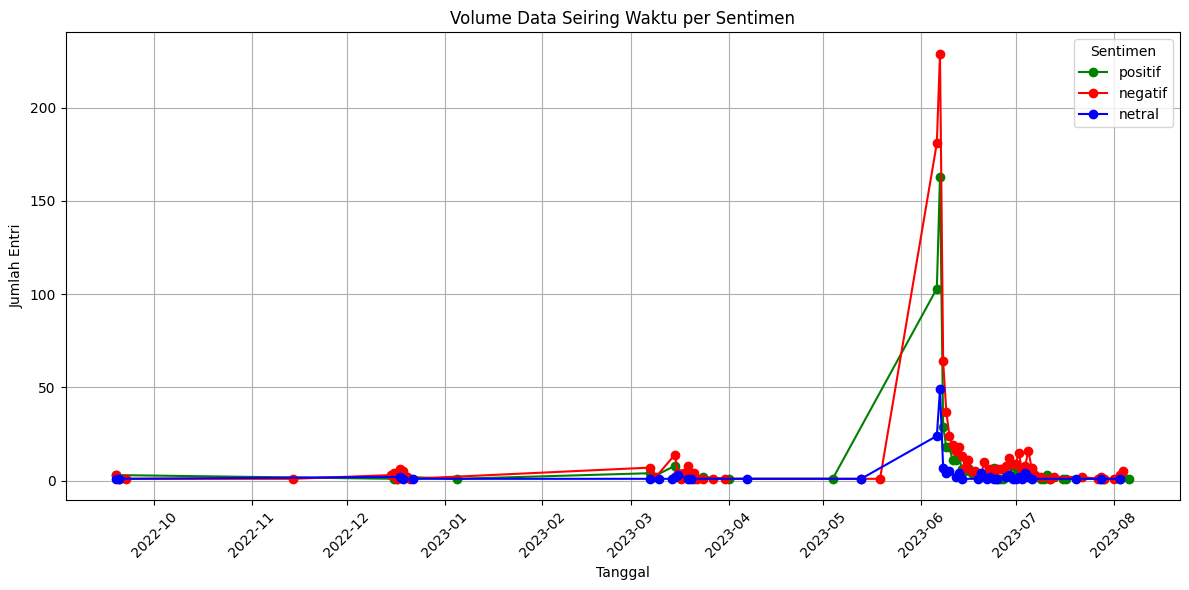

In [ ]:
# Membuat list untuk menyimpan data per sentimen
sentiments = df['sentimen'].unique()
colors = ['g', 'r', 'b']  # Warna untuk masing-masing sentimen

# Plotting
plt.figure(figsize=(12, 6))

for sentiment, color in zip(sentiments, colors):
    # Filter data berdasarkan sentimen
    sentiment_data = df[df['sentimen'] == sentiment]

    # Mengelompokkan data berdasarkan tanggal dan menghitung jumlah entri per tanggal
    sentiment_date_counts = sentiment_data['tanggal'].dt.date.value_counts().sort_index()

    # Plotting
    plt.plot(sentiment_date_counts.index, sentiment_date_counts.values, marker='o', linestyle='-', color=color, label=sentiment)

# Menambahkan elemen grafik
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Entri')
plt.title('Volume Data Seiring Waktu per Sentimen')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Sentimen')
plt.tight_layout()
plt.show()

## Wordcloud secara umum (dari kolom: text_cleaning3_lem)

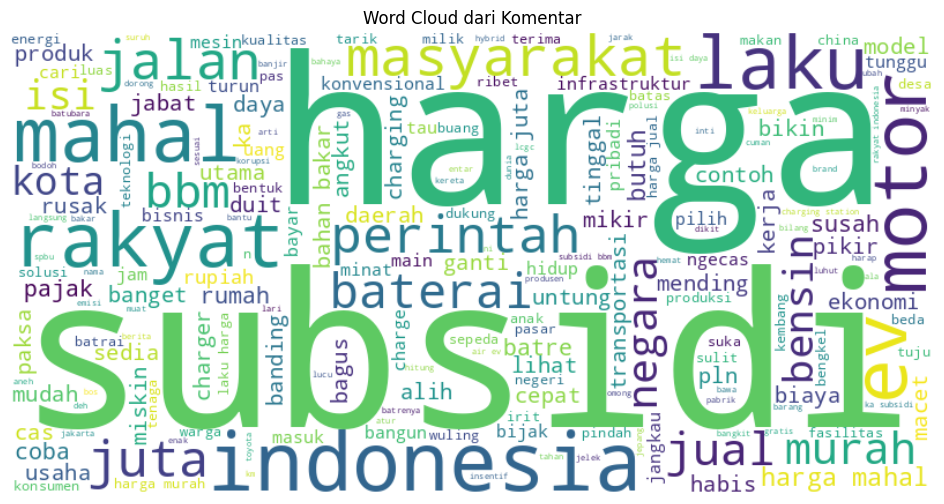

In [ ]:
# Daftar kata yang ingin dihapus
words_to_remove = ['beli', 'kendara', 'pakai', 'orang','kayak','sih']

# Gabungkan semua teks dari kolom 'text_cleaning3_lem' menjadi satu string
text = ' '.join(df['text_cleaning3_lem'])

# Hapus kata-kata yang tidak diinginkan dari teks
for word in words_to_remove:
    text = text.replace(word, '')

# Buat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Tampilkan Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Menyembunyikan sumbu
plt.title('Word Cloud dari Komentar')
plt.show()

In [ ]:
from collections import Counter

# Daftar kata yang ingin dihapus
words_to_remove = ['beli', 'kendara', 'pakai', 'orang','kayak','sih']

# Gabungkan semua teks dari kolom 'text_cleaning3_lem' menjadi satu string
text = ' '.join(df['text_cleaning3_lem'])

# Hapus kata-kata yang tidak diinginkan dari teks
for word in words_to_remove:
    text = text.replace(word, '')

# Pisahkan teks menjadi daftar kata
word_list = text.split()

# Hitung frekuensi kemunculan setiap kata
word_counts = Counter(word_list)

# Cetak 20 kata yang paling sering muncul
top_20_words = word_counts.most_common(20)
print("20 Kata yang Paling Sering Muncul:")
for word, count in top_20_words:
    print(f"{word}: {count}")

20 Kata yang Paling Sering Muncul:
harga: 447
subsidi: 288
mahal: 256
ev: 217
indonesia: 216
rakyat: 201
laku: 199
juta: 183
motor: 173
masyarakat: 163
jalan: 160
perintah: 148
baterai: 137
jual: 136
bbm: 135
murah: 125
isi: 113
negara: 102
bensin: 93
butuh: 89


## Wordcloud dari tiap sentimen (dari kolom: text_cleaning3_lem)

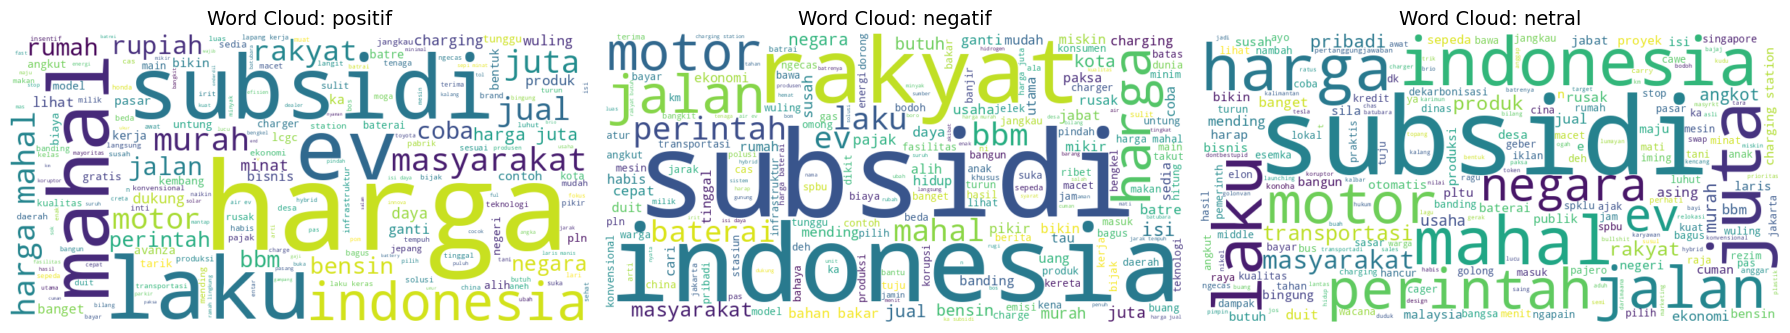

In [ ]:
# Daftar kata yang ingin dihapus
words_to_remove = ['beli', 'kendara', 'pakai', 'orang','kayak','sih']

# Daftar sentimen unik
sentiments = df['sentimen'].unique()

# Membuat subplots
plt.figure(figsize=(18, 6))

# Warna untuk setiap subplot (opsional, jika ingin menggunakan warna berbeda)
colors = ['b', 'g', 'r']

# Loop untuk setiap sentimen
for i, sentiment in enumerate(sentiments):
    # Filter data berdasarkan sentimen
    sentiment_data = df[df['sentimen'] == sentiment]

    # Gabungkan semua teks dari kolom 'text_cleaning3_lem' untuk sentimen ini
    text = ' '.join(sentiment_data['text_cleaning3_lem'])

    # Hapus kata-kata yang tidak diinginkan dari teks
    for word in words_to_remove:
        text = text.replace(word, '')

    # Buat Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot Word Cloud
    plt.subplot(1, 3, i + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud: {sentiment}', fontsize=14)

# Tampilkan grafik
plt.tight_layout()
plt.show()

In [ ]:
# Daftar kata yang ingin dihapus
words_to_remove = ['beli', 'kendara', 'pakai', 'orang', 'kayak', 'sih']

# Daftar sentimen unik
sentiments = df['sentimen'].unique()

# Loop untuk setiap sentimen
for sentiment in sentiments:
    # Filter data berdasarkan sentimen
    sentiment_data = df[df['sentimen'] == sentiment]

    # Gabungkan semua teks dari kolom 'text_cleaning3_lem' untuk sentimen ini
    text = ' '.join(sentiment_data['text_cleaning3_lem'])

    # Hapus kata-kata yang tidak diinginkan dari teks
    for word in words_to_remove:
        text = text.replace(word, '')

    # Pisahkan teks menjadi daftar kata
    word_list = text.split()

    # Hitung frekuensi kemunculan setiap kata
    word_counts = Counter(word_list)

    # Cetak 20 kata yang paling sering muncul untuk sentimen ini
    top_20_words = word_counts.most_common(20)
    print(f"\n20 Kata yang Paling Sering Muncul untuk Sentimen '{sentiment}':")
    for word, count in top_20_words:
        print(f"{word}: {count}")



20 Kata yang Paling Sering Muncul untuk Sentimen 'positif':
harga: 240
mahal: 117
laku: 80
ev: 77
juta: 77
subsidi: 74
indonesia: 58
masyarakat: 57
murah: 54
jual: 50
motor: 45
rakyat: 43
coba: 33
rupiah: 32
jalan: 30
rumah: 29
bensin: 27
bbm: 26
minat: 25
daya: 24

20 Kata yang Paling Sering Muncul untuk Sentimen 'negatif':
harga: 195
subsidi: 171
rakyat: 150
indonesia: 146
ev: 129
mahal: 127
baterai: 122
jalan: 118
motor: 116
perintah: 114
laku: 107
bbm: 105
isi: 98
masyarakat: 95
juta: 92
jual: 82
butuh: 79
negara: 68
kota: 68
bakar: 65

20 Kata yang Paling Sering Muncul untuk Sentimen 'netral':
subsidi: 43
juta: 14
mahal: 12
laku: 12
indonesia: 12
harga: 12
jalan: 12
motor: 12
perintah: 11
negara: 11
ev: 11
masyarakat: 11
transportasi: 9
rakyat: 8
produk: 8
pribadi: 7
murah: 6
angkot: 6
usaha: 5
charging: 5


Info menarik:

Terdapat merk mobil 'Wuling' pada setiap sentimen.

Penggunaan kata 'mahal'

### Lebih lanjut mengenai 'wuling'

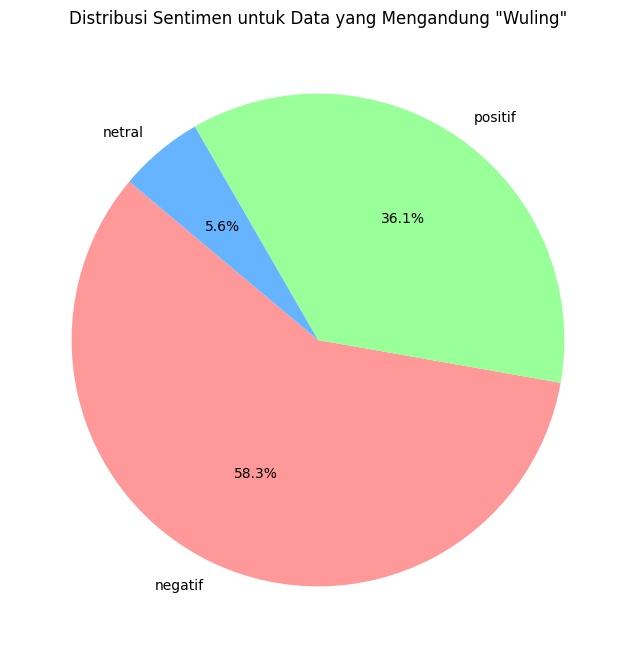

In [ ]:
# Filter data untuk entri yang mengandung kata 'wuling'
filtered_df = df[df['text_cleaning3_lem'].str.contains('wuling', case=False, na=False)]

# Hitung jumlah entri untuk setiap sentimen
sentiment_counts = filtered_df['sentimen'].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#99ff99','#66b3ff'])
plt.title('Distribusi Sentimen untuk Data yang Mengandung "Wuling"')
plt.show()

In [ ]:
# Filter baris yang mengandung kata 'wuling' pada kolom 'text_cleaning3_lem'
wuling_rows = df[df['text_cleaning3_lem'].str.contains('wuling', case=False, na=False)]

# Tampilkan baris-baris tersebut
wuling_rows[['sentimen','text_cleaning']]

,sentimen,text_cleaning
154,positif,mau banget ganti ev mau wuling merek lebih established skema gampang wuling ev harga jt jadi standar perintah subsidi toyota bzx honda prologue hyundai ioniq harga sumpah bakal banyak ganti ev
158,positif,harga ev mahal solusi perintah suruh guna non ev bayar mau pakai jalan ev wuling harga avanza mana punya size lebih besar fitur lebih banyak masuk akal pilih wuling hyundai ioniq harga pajero harga hybrid murah guna jalan bayar lalu pajak guna non ev bayar
192,negatif,masuk wuling bingo lini depan byd bawah jt boom problem solve
218,negatif,turut bukan kurang tahu masyarakat hitung kurang asumsi jalan km per tahun km per hari asumsi harga wuling air ev juta estimasi umur baterai tahun layak pakai x isi kwh x rb rb km tahun tahun juta estimasi harga baterai wuling tahun juta vs asumsi ice wuling confero juta bensin km liter x rb tahun juta tahun juta catat harga bensin top up ratio kmpl toleransi atas counter harga baterai anggap masuk akal asumsi atas beli lebih hemat juta per tahun capai bep butuh waktu tahun baru kata lebih hemat ice catat tidak tahu resiko ev new tech sulit pergi jarak jauh luar kota ukur lebih kecil baterai bekas apa turun efisiensi baterai sangat wajar masyarakat enggan migrasi
264,positif,gimana mau laku wong harga ev indonesia luar biasa mahal insentif ful subsidi pajak ev ckd ngebuat wuling air ev harga negara jtan sini ful subsidi jual jt biasa wuling jual harga value for money padahal ev bilang wuling larang jual terlalu murah menganggu market lcgc
267,positif,pln siap beli wuling ev fast charge sekarang fast charger bengkalai pln beri daya extra jangan teman minta extra kata pln quota penuh percuma subsidi pln beri anggar luas jaring distribusi
322,positif,harga airev wuling china indonesia jual jt
339,positif,harga china jt sampe sini dibandrol jt subsidi jt konsumen jt harga china wuling miniev rpjt indonesia jt
349,netral,wuling ev jt lebih tara pajero sport orang kaya milih pajero ketimbang air ev
498,positif,tidak praktis harga mahal lengkap dukung after sales produk sebab utama kendara sepi minat contoh paling sering keluh ialah sifat buah kendara butuh waktu relatif lama isi tenaga tmpt fast charging sedia tetap butuh waktu minimal satu jam dukung karakter mobile buah kendara charging rumah butuh waktu jauh lebih lama jam akhir masyarakat rasa kendara ikut mobilitas tinggi guna harga relatif mahal buah kendara mungil wuling banyak jenis patok harga sesuai kapasitas kendara tsb konsumen paksa mengguinakan kendara tambah


## Bagaimana persebaran banyak kata pada data komentar?

In [ ]:
# Menghitung jumlah kata pada kolom 'text_cleaning'
df['word_count_cleaning'] = df['text_cleaning'].apply(lambda x: len(str(x).split()))

# Menghitung jumlah kata pada kolom 'text_cleaning3_lem'
df['word_count_cleaning3_lem'] = df['text_cleaning3_lem'].apply(lambda x: len(str(x).split()))

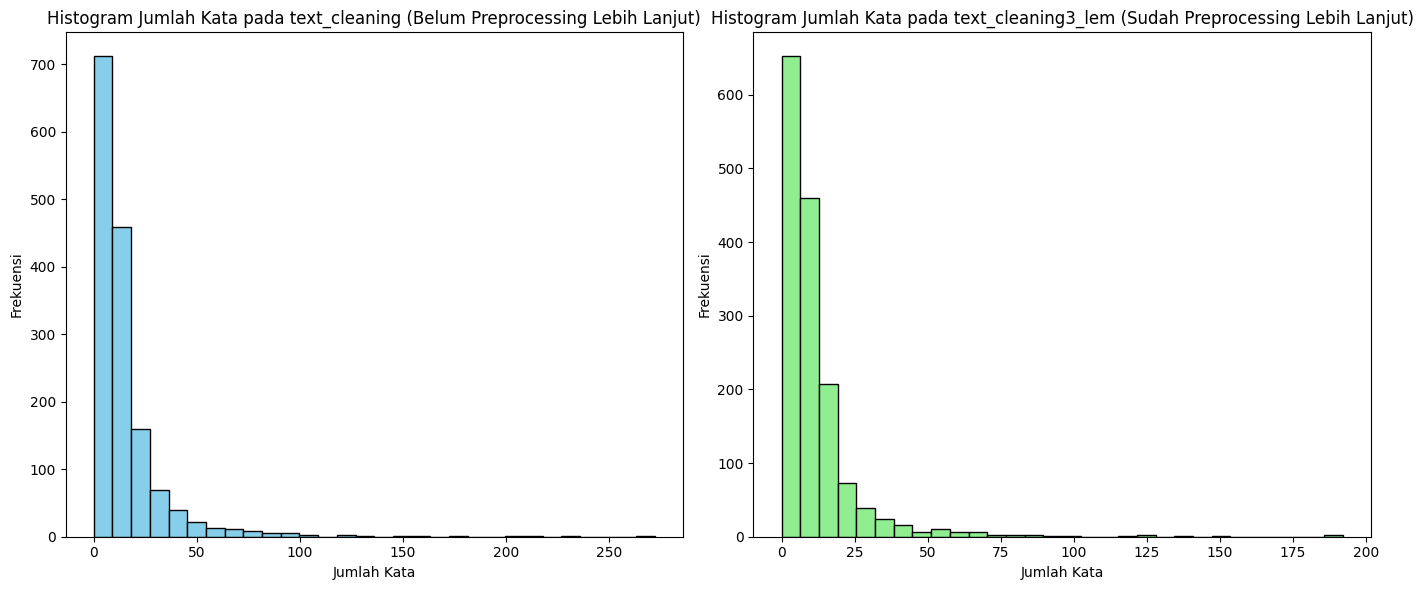

In [ ]:
# Plot histogram untuk 'word_count_cleaning'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(df['word_count_cleaning'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.title('Histogram Jumlah Kata pada text_cleaning (Belum Preprocessing Lebih Lanjut)')

# Plot histogram untuk 'word_count_cleaning2_lem'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(df['word_count_cleaning3_lem'], bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.title('Histogram Jumlah Kata pada text_cleaning3_lem (Sudah Preprocessing Lebih Lanjut)')

plt.tight_layout()
plt.show()

### Apakah ada pola banyak kata pada tiap sentimennya?

<Axes: xlabel='sentimen', ylabel='word_count_cleaning2_lem'>

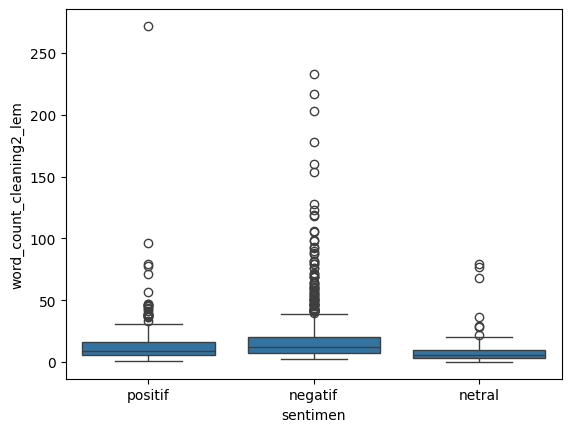

In [ ]:
sns.boxplot(y='word_count_cleaning2_lem', x='sentimen', data=df)

<ipython-input-61-0ea9b87335bc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sentimen', y='word_count_cleaning3_lem', data=df, palette='Set2')


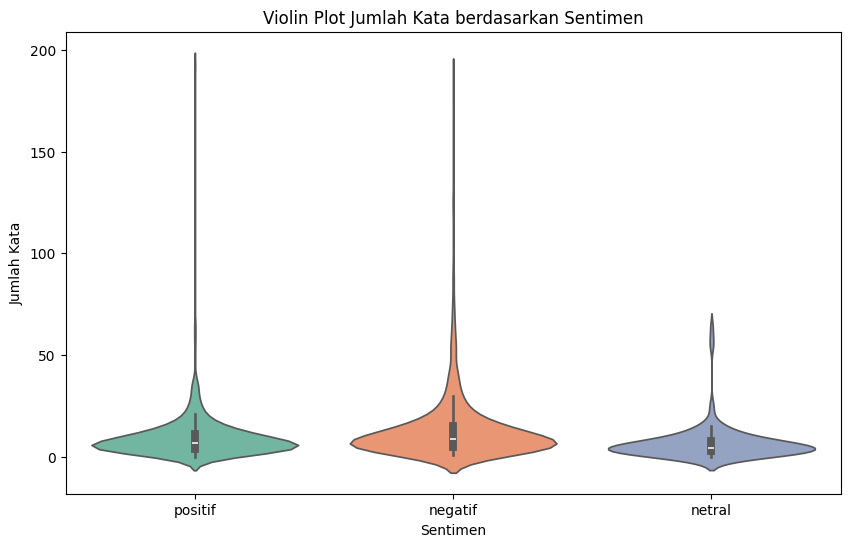

In [ ]:
# Violin Plot untuk melihat distribusi jumlah kata berdasarkan sentimen
plt.figure(figsize=(10, 6))
sns.violinplot(x='sentimen', y='word_count_cleaning3_lem', data=df, palette='Set2')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Kata')
plt.title('Violin Plot Jumlah Kata berdasarkan Sentimen')
plt.show()

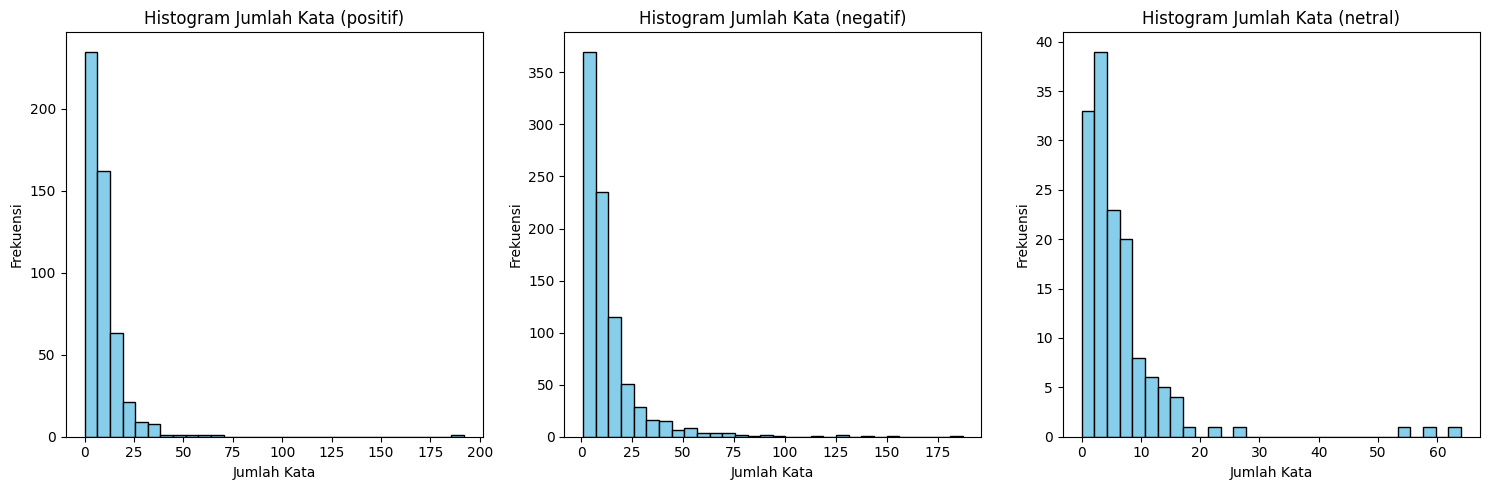

In [ ]:
# Dapatkan daftar unik dari sentimen
sentiments = df['sentimen'].unique()

# Setup untuk plotting
plt.figure(figsize=(15, 5))

for i, sentiment in enumerate(sentiments):
    plt.subplot(1, 3, i + 1)  # 1 row, 3 columns, subplot ke-i+1
    subset = df[df['sentimen'] == sentiment]  # Filter berdasarkan sentimen
    plt.hist(subset['word_count_cleaning3_lem'], bins=30, color='skyblue', edgecolor='black')
    plt.xlabel('Jumlah Kata')
    plt.ylabel('Frekuensi')
    plt.title(f'Histogram Jumlah Kata ({sentiment})')

plt.tight_layout()
plt.show()

# Modeling & Evaluation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   nama_akun                 1517 non-null   object             
 1   tanggal                   1517 non-null   datetime64[ns, UTC]
 2   text_cleaning             1517 non-null   object             
 3   sentimen                  1517 non-null   object             
 4   tanggal_var               1517 non-null   object             
 5   jam_var                   1517 non-null   object             
 6   utc_var                   1517 non-null   object             
 7   text_cleaning1            1517 non-null   object             
 8   text_cleaning2            1517 non-null   object             
 9   text_cleaning3            1517 non-null   object             
 10  text_cleaning2_lem        1517 non-null   object             
 11  text_cleaning3_le

## Model

In [ ]:
# Definisikan model-model yang akan digunakan dengan random_state jika memungkinkan
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'MultinomialNB': MultinomialNB(),  # MultinomialNB tidak memiliki parameter random_state
    'GaussianNB': GaussianNB(),  # GaussianNB tidak memiliki parameter random_state
    'SVC': SVC(random_state=42, probability=True),
    'XGBoost': XGBClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
}

In [ ]:
# Definisikan fungsi untuk menjalankan model dengan fleksibilitas test_size dan pilihan oversampling
def run_model_sampling(X, y, mlmodel, sampling=None, test_size=0.3, oversample=True):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    print(f"\n\nModel: {mlmodel.__class__.__name__}")
    print("Before Sampling:", Counter(y_train))

    vectorizer_smote = TfidfVectorizer()
    vectorizer_smote.fit(X_train)

    # Vektorisasi X_train
    X_train_vec = vectorizer_smote.transform(X_train).toarray()

    # Vektorisasi X_test
    X_test_vec = vectorizer_smote.transform(X_test).toarray()

    # Memakai oversampling untuk menangani masalah imbalance data (Jika sampling didefinisikan dan oversample=True)
    if sampling and oversample:
        X_train_vec, y_train = sampling.fit_resample(X_train_vec, y_train)

    print("After Sampling:", Counter(y_train))

    # Train dan evaluasi model
    mlmodel.fit(X_train_vec, y_train)
    y_preds = mlmodel.predict(X_test_vec)

    # Menghitung akurasi pada dataset test
    test_accuracy = accuracy_score(y_test, y_preds)
    print(f"Test Accuracy: {test_accuracy}")

    # Melakukan cross-validation
    cross_val_scores = cross_val_score(mlmodel, X_train_vec, y_train, cv=5)
    cross_val_mean = cross_val_scores.mean()
    cross_val_std = cross_val_scores.std()

    print(f"Cross-Validation Mean Accuracy: {cross_val_mean}")
    print(f"Cross-Validation Std Dev: {cross_val_std}")

    # Menghitung ROC AUC jika model support probability prediction
    if hasattr(mlmodel, "predict_proba"):
        y_pred_proba = mlmodel.predict_proba(X_test_vec)
        roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
        print(f"ROC AUC: {roc_auc:.4f}")
    else:
        roc_auc = None
        print("ROC AUC: Not available (model does not support probability prediction)")

    # Print hasil klasifikasi
    print(classification_report(y_test, y_preds, target_names=['class 0', 'class 1', 'class 2']))

    return test_accuracy, cross_val_mean, cross_val_std, roc_auc

### Dengan SMOTE

In [ ]:
# Simpan hasil akurasi, cross-validation, dan ROC AUC dalam list
results = []

# Loop melalui setiap model dan jalankan model sampling dengan test_size yang dapat diubah
for model_name, model in models.items():
    sampling = SMOTE(sampling_strategy='auto', random_state=42)
    test_accuracy, cross_val_mean, cross_val_std, roc_auc = run_model_sampling(
        df['text_cleaning2_lem'], df['sentimen_label_encoded'].values, model, sampling, test_size=0.3, oversample=True)

    results.append({
        'Model': model_name,
        'Test Accuracy': test_accuracy,
        'CV Mean Accuracy': cross_val_mean,
        'CV Std Dev': cross_val_std,
        'ROC AUC': roc_auc
    })

# Buat DataFrame dari hasil akurasi, cross-validation, dan ROC AUC
results_df = pd.DataFrame(results)
print(results_df)



Model: RandomForestClassifier
Before Sampling: Counter({0: 600, 2: 359, 1: 102})
After Sampling: Counter({0: 600, 2: 600, 1: 600})
Test Accuracy: 0.6776315789473685
Cross-Validation Mean Accuracy: 0.8355555555555556
Cross-Validation Std Dev: 0.0491093514013546
ROC AUC: 0.7633
              precision    recall  f1-score   support

     class 0       0.80      0.74      0.77       269
     class 1       0.26      0.45      0.33        42
     class 2       0.68      0.63      0.65       145

    accuracy                           0.68       456
   macro avg       0.58      0.61      0.58       456
weighted avg       0.71      0.68      0.69       456



Model: MultinomialNB
Before Sampling: Counter({0: 600, 2: 359, 1: 102})
After Sampling: Counter({0: 600, 2: 600, 1: 600})
Test Accuracy: 0.6842105263157895
Cross-Validation Mean Accuracy: 0.8261111111111111
Cross-Validation Std Dev: 0.046301481191143606
ROC AUC: 0.7546
              precision    recall  f1-score   support

     class 0 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Accuracy: 0.4868421052631579


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Cross-Validation Mean Accuracy: 0.6638888888888888
Cross-Validation Std Dev: 0.030071930228276325
ROC AUC: 0.5962
              precision    recall  f1-score   support

     class 0       0.79      0.43      0.56       269
     class 1       0.15      0.55      0.24        42
     class 2       0.53      0.57      0.54       145

    accuracy                           0.49       456
   macro avg       0.49      0.52      0.45       456
weighted avg       0.64      0.49      0.53       456



Model: GradientBoostingClassifier
Before Sampling: Counter({0: 600, 2: 359, 1: 102})
After Sampling: Counter({0: 600, 2: 600, 1: 600})
Test Accuracy: 0.625
Cross-Validation Mean Accuracy: 0.7527777777777778
Cross-Validation Std Dev: 0.019002923751652315
ROC AUC: 0.7634
              precision    recall  f1-score   support

     class 0       0.81      0.66      0.73       269
     class 1       0.20      0.48      0.29        42
     class 2       0.63      0.60      0.61       145

    accuracy   

### Tanpa SMOTE

In [ ]:
# Simpan hasil akurasi, cross-validation, dan ROC AUC dalam list
results = []

# Loop melalui setiap model dan jalankan model sampling dengan test_size yang dapat diubah
for model_name, model in models.items():
    sampling = SMOTE(sampling_strategy='auto', random_state=42)
    test_accuracy, cross_val_mean, cross_val_std, roc_auc = run_model_sampling(
        df['text_cleaning2_lem'], df['sentimen_label_encoded'].values, model, sampling, test_size=0.3, oversample=False)

    results.append({
        'Model': model_name,
        'Test Accuracy': test_accuracy,
        'CV Mean Accuracy': cross_val_mean,
        'CV Std Dev': cross_val_std,
        'ROC AUC': roc_auc
    })

# Buat DataFrame dari hasil akurasi, cross-validation, dan ROC AUC
results_df = pd.DataFrame(results)
print(results_df)



Model: RandomForestClassifier
Before Sampling: Counter({0: 600, 2: 359, 1: 102})
After Sampling: Counter({0: 600, 2: 359, 1: 102})
Test Accuracy: 0.6973684210526315
Cross-Validation Mean Accuracy: 0.6616130746744618
Cross-Validation Std Dev: 0.028181439956123842
ROC AUC: 0.7781
              precision    recall  f1-score   support

     class 0       0.77      0.82      0.79       269
     class 1       0.31      0.36      0.33        42
     class 2       0.69      0.57      0.62       145

    accuracy                           0.70       456
   macro avg       0.59      0.58      0.58       456
weighted avg       0.70      0.70      0.70       456



Model: MultinomialNB
Before Sampling: Counter({0: 600, 2: 359, 1: 102})
After Sampling: Counter({0: 600, 2: 359, 1: 102})
Test Accuracy: 0.6206140350877193
Cross-Validation Mean Accuracy: 0.6079236424838339
Cross-Validation Std Dev: 0.011060446730575452
ROC AUC: 0.7823
              precision    recall  f1-score   support

     class 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


After Sampling: Counter({0: 600, 2: 359, 1: 102})
Test Accuracy: 0.5372807017543859
Cross-Validation Mean Accuracy: 0.5155903977323059
Cross-Validation Std Dev: 0.026292342251696
ROC AUC: 0.5826
              precision    recall  f1-score   support

     class 0       0.67      0.64      0.65       269
     class 1       0.25      0.26      0.26        42
     class 2       0.40      0.43      0.41       145

    accuracy                           0.54       456
   macro avg       0.44      0.44      0.44       456
weighted avg       0.55      0.54      0.54       456



Model: SVC
Before Sampling: Counter({0: 600, 2: 359, 1: 102})
After Sampling: Counter({0: 600, 2: 359, 1: 102})
Test Accuracy: 0.7258771929824561
Cross-Validation Mean Accuracy: 0.6682212773496323
Cross-Validation Std Dev: 0.02362431824879881
ROC AUC: 0.8204
              precision    recall  f1-score   support

     class 0       0.71      0.97      0.82       269
     class 1       1.00      0.02      0.05        42


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Accuracy: 0.6622807017543859


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Cross-Validation Mean Accuracy: 0.6248383382053326
Cross-Validation Std Dev: 0.03237899274616134
ROC AUC: 0.6268
              precision    recall  f1-score   support

     class 0       0.70      0.81      0.75       269
     class 1       0.23      0.12      0.16        42
     class 2       0.64      0.54      0.58       145

    accuracy                           0.66       456
   macro avg       0.52      0.49      0.50       456
weighted avg       0.64      0.66      0.64       456



Model: GradientBoostingClassifier
Before Sampling: Counter({0: 600, 2: 359, 1: 102})
After Sampling: Counter({0: 600, 2: 359, 1: 102})
Test Accuracy: 0.7039473684210527
Cross-Validation Mean Accuracy: 0.6663256267162725
Cross-Validation Std Dev: 0.02352959611901264
ROC AUC: 0.7520
              precision    recall  f1-score   support

     class 0       0.72      0.88      0.79       269
     class 1       0.00      0.00      0.00        42
     class 2       0.69      0.59      0.63       145

    

## Note

### SMOTE vs NO SMOTE

Berikut adalah perbandingan hasil modeling dengan dan tanpa SMOTE:

```
Dengan SMOTE
                Model  Test Accuracy  CV Mean Accuracy  CV Std Dev   ROC AUC
0        RandomForest       0.677632          0.835556    0.049109  0.763282
1       MultinomialNB       0.684211          0.826111    0.046301  0.754581
2          GaussianNB       0.541667          0.806667    0.040123  0.584912
3                 SVC       0.730263          0.891667    0.083370  0.812605
4             XGBoost       0.673246          0.823889    0.049116  0.797333
5  LogisticRegression       0.721491          0.850000    0.037226  0.800564
6        DecisionTree       0.524123          0.745556    0.048068  0.624920
7             Bagging       0.567982          0.765000    0.039698  0.717344
8            AdaBoost       0.486842          0.663889    0.030072  0.596151
9    GradientBoosting       0.625000          0.752778    0.019003  0.763394
```




```
Tanpa SMOTE:
                Model  Test Accuracy  CV Mean Accuracy  CV Std Dev   ROC AUC
0        RandomForest       0.697368          0.661613    0.028181  0.778124
1       MultinomialNB       0.620614          0.607924    0.011060  0.782263
2          GaussianNB       0.537281          0.515590    0.026292  0.582601
3                 SVC       0.725877          0.668221    0.023624  0.820441
4             XGBoost       0.712719          0.687058    0.039850  0.783705
5  LogisticRegression       0.754386          0.700248    0.038625  0.828280
6        DecisionTree       0.587719          0.586212    0.034105  0.643886
7             Bagging       0.622807          0.622965    0.032605  0.738160
8            AdaBoost       0.662281          0.624838    0.032379  0.626788
9    GradientBoosting       0.703947          0.666326    0.023530  0.752040
```



Setelah melakukan modeling, didapat bahwa beberapa algoritma dengan model TANPA handling imbalance data dengan SMOTE memiliki nilai akurasi yang lebih TINGGI. Namun, ketika melihat hasil dari cross validationnya, nilai model TANPA handling imbalance data dengan SMOTE memiliki nilai CV Mean Accuarcy yang lebih RENDAH.

Oleh karena itu, SMOTE pada dataset ini dinilai penting untuk dilakukan, akan dipilih model DENGAN MENGGUNAKAN SMOTE.

### Perbandingan Model





Setelah melihat nilai Accuracy, CV Mean Accuracy, Precision, Recall, F1-Score kami memilih model SVM Classifier sebagai model terbaik dalam memprediksi sentimen pada data ini.



```
Model: SVC
Before Sampling: Counter({0: 600, 2: 359, 1: 102})
After Sampling: Counter({0: 600, 2: 600, 1: 600})
Test Accuracy: 0.7302631578947368
Cross-Validation Mean Accuracy: 0.8916666666666668
Cross-Validation Std Dev: 0.08337036214357364
ROC AUC: 0.8126
              precision    recall  f1-score   support

     class 0       0.71      0.96      0.82       269
     class 1       1.00      0.05      0.09        42
     class 2       0.79      0.50      0.61       145

    accuracy                           0.73       456
   macro avg       0.83      0.50      0.51       456
weighted avg       0.76      0.73      0.69       456
```

### Kesimpulan

Jadi, dipilih model SVM Classifier (SVC) dengan menggunakan SMOTE dalam memprediksi sentimen

## Hyperparameter Tuning

### SVM dengan default parameters

In [ ]:
# Definisikan model SVC
svc_model = SVC(random_state=42, probability=True)  # Set probability=True untuk mendapatkan ROC AUC

In [ ]:
# Definisikan fungsi untuk menjalankan model SVC dengan fleksibilitas test_size dan pilihan oversampling
def run_svc_model(X, y, sampling=None, test_size=0.3, oversample=True):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    print(f"\n\nModel: {svc_model.__class__.__name__}")
    print("Before Sampling:", Counter(y_train))

    vectorizer_smote = TfidfVectorizer()
    vectorizer_smote.fit(X_train)

    # Vectorizing the X_train
    X_train_vec = vectorizer_smote.transform(X_train).toarray()

    # Vectorizing the X_test
    X_test_vec = vectorizer_smote.transform(X_test).toarray()

    # Apply sampling (if specified and if oversample is True)
    if sampling and oversample:
        X_train_vec, y_train = sampling.fit_resample(X_train_vec, y_train)

    print("After Sampling:", Counter(y_train))

    # Train and evaluate the SVC model
    svc_model.fit(X_train_vec, y_train)
    y_preds = svc_model.predict(X_test_vec)

    # Calculate accuracy on the test set
    test_accuracy = accuracy_score(y_test, y_preds)
    print(f"Test Accuracy: {test_accuracy}")

    # Perform cross-validation
    cross_val_scores = cross_val_score(svc_model, X_train_vec, y_train, cv=5)
    cross_val_mean = cross_val_scores.mean()
    cross_val_std = cross_val_scores.std()

    print(f"Cross-Validation Mean Accuracy: {cross_val_mean}")
    print(f"Cross-Validation Std Dev: {cross_val_std}")

    # Calculate ROC AUC
    if hasattr(svc_model, "predict_proba"):
        y_pred_proba = svc_model.predict_proba(X_test_vec)
        roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
        print(f"ROC AUC: {roc_auc:.4f}")
    else:
        roc_auc = None
        print("ROC AUC: Not available (model does not support probability prediction)")

    # Print classification report
    print(classification_report(y_test, y_preds, target_names=['class 0', 'class 1', 'class 2']))

    return test_accuracy, cross_val_mean, cross_val_std, roc_auc

In [ ]:
# Jalankan model SVC dengan sampling SMOTE dan test_size yang dapat diubah
sampling = SMOTE(sampling_strategy='auto', random_state=42)
test_accuracy, cross_val_mean, cross_val_std, roc_auc = run_svc_model(
    df['text_cleaning2_lem'], df['sentimen_label_encoded'].values, sampling, test_size=0.3, oversample=True)

# Simpan hasil dalam dictionary dan cetak hasilnya
svc_results = {
    'Model': 'SVC',
    'Test Accuracy': test_accuracy,
    'CV Mean Accuracy': cross_val_mean,
    'CV Std Dev': cross_val_std,
    'ROC AUC': roc_auc
}

# Buat DataFrame dari hasil SVC dan print
svc_results_df = pd.DataFrame([svc_results])
print(svc_results_df)



Model: SVC
Before Sampling: Counter({0: 600, 2: 359, 1: 102})
After Sampling: Counter({0: 600, 2: 600, 1: 600})
Test Accuracy: 0.7302631578947368
Cross-Validation Mean Accuracy: 0.8916666666666668
Cross-Validation Std Dev: 0.08337036214357364
ROC AUC: 0.8126
              precision    recall  f1-score   support

     class 0       0.71      0.96      0.82       269
     class 1       1.00      0.05      0.09        42
     class 2       0.79      0.50      0.61       145

    accuracy                           0.73       456
   macro avg       0.83      0.50      0.51       456
weighted avg       0.76      0.73      0.69       456

  Model  Test Accuracy  CV Mean Accuracy  CV Std Dev   ROC AUC
0   SVC       0.730263          0.891667     0.08337  0.812605


### Hyperparameter Tuning dengan GridSearch CV

In [ ]:
# Definisikan fungsi untuk menjalankan model dengan fleksibilitas test_size, pilihan oversampling, dan hyperparameter tuning
def run_model_sampling(X, y, mlmodel, param_grid=None, sampling=None, test_size=0.3, oversample=True):
    # Membagi data menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    print(f"\n\nModel: {mlmodel.__class__.__name__}")
    print("Before Sampling:", Counter(y_train))

    # Inisialisasi dan fitting vectorizer
    vectorizer_smote = TfidfVectorizer()
    vectorizer_smote.fit(X_train)

    # Melakukan vektorisasi pada X_train
    X_train_vec = vectorizer_smote.transform(X_train).toarray()

    # Melakukan vektorisasi pada X_test
    X_test_vec = vectorizer_smote.transform(X_test).toarray()

    # Terapkan sampling jika didef dan oversample=True
    if sampling and oversample:
        X_train_vec, y_train = sampling.fit_resample(X_train_vec, y_train)

    print("After Sampling:", Counter(y_train))

    # Jika grid parameter disediakan, lakukan GridSearchCV
    if param_grid:
        grid_search = GridSearchCV(estimator=mlmodel, param_grid=param_grid, scoring='accuracy', cv=5, verbose=0)
        grid_search.fit(X_train_vec, y_train)
        mlmodel = grid_search.best_estimator_

        print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
        print('Parameters that give the best results :', '\n\n', grid_search.best_params_)
        print('\n\nEstimator that was chosen by the search :', '\n\n', grid_search.best_estimator_)

    # Train dan mengevaluasi model
    mlmodel.fit(X_train_vec, y_train)
    y_preds = mlmodel.predict(X_test_vec)

    # Menghitung akurasi pada dataset test
    test_accuracy = accuracy_score(y_test, y_preds)
    print(f"Test Accuracy: {test_accuracy}")

    # Melakukan cross-validation
    cross_val_scores = cross_val_score(mlmodel, X_train_vec, y_train, cv=5)
    cross_val_mean = cross_val_scores.mean()
    cross_val_std = cross_val_scores.std()

    print(f"Cross-Validation Mean Accuracy: {cross_val_mean}")
    print(f"Cross-Validation Std Dev: {cross_val_std}")

    # Menghitung ROC AUC jika model supports probability prediction
    if hasattr(mlmodel, "predict_proba"):
        y_pred_proba = mlmodel.predict_proba(X_test_vec)
        roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
        print(f"ROC AUC: {roc_auc:.4f}")
    else:
        roc_auc = None
        print("ROC AUC: Not available (model does not support probability prediction)")

    # Print classification report
    print(classification_report(y_test, y_preds, target_names=['class 0', 'class 1', 'class 2']))

    return test_accuracy, cross_val_mean, cross_val_std, roc_auc

In [ ]:
# Hyperparameter tuning setup for SVC
svc_param_grid = [
    {'C':[1, 10, 100, 1000], 'kernel':['linear']},
    {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
    {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]}
]

# Model setup
models = {
    'SVC': SVC(random_state=42)
}

# Simpan hasil akurasi, cross-validation, dan ROC AUC dalam list
results = []

# Loop melalui setiap model dan jalankan model sampling dengan hyperparameter tuning
for model_name, model in models.items():
    sampling = SMOTE(sampling_strategy='auto', random_state=42)
    test_accuracy, cross_val_mean, cross_val_std, roc_auc = run_model_sampling(
        df['text_cleaning2_lem'], df['sentimen_label_encoded'].values, model, param_grid=svc_param_grid, sampling=sampling, test_size=0.3, oversample=True)

    results.append({
        'Model': model_name,
        'Test Accuracy': test_accuracy,
        'CV Mean Accuracy': cross_val_mean,
        'CV Std Dev': cross_val_std,
        'ROC AUC': roc_auc
    })

# Buat DataFrame dari hasil akurasi, cross-validation, dan ROC AUC
results_df = pd.DataFrame(results)
print(results_df)



Model: SVC
Before Sampling: Counter({0: 600, 2: 359, 1: 102})
After Sampling: Counter({0: 600, 2: 600, 1: 600})
GridSearch CV best score : 0.9161


Parameters that give the best results : 

 {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=1000, gamma=0.1, random_state=42)
Test Accuracy: 0.7390350877192983
Cross-Validation Mean Accuracy: 0.9161111111111111
Cross-Validation Std Dev: 0.01715938356831166
ROC AUC: Not available (model does not support probability prediction)
              precision    recall  f1-score   support

     class 0       0.79      0.88      0.83       269
     class 1       0.23      0.12      0.16        42
     class 2       0.72      0.66      0.69       145

    accuracy                           0.74       456
   macro avg       0.58      0.55      0.56       456
weighted avg       0.71      0.74      0.72       456

  Model  Test Accuracy  CV Mean Accuracy  CV Std Dev ROC AUC
0   SVC       0.739035          0

Jadi, didapat parameter terbaik untuk model SVC sebagai berikut:
 {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

### SVC with Parameter from Grid Search

In [ ]:
# Definisikan model SVC dengan parameter terbaik
svc_model = SVC(C=1000, gamma=0.1, kernel='rbf', random_state=42, probability=True)  # Set probability=True untuk mendapatkan ROC AUC

In [ ]:
# Definisikan fungsi untuk menjalankan model SVC dengan fleksibilitas test_size dan pilihan oversampling
def run_svc_model(X, y, sampling=None, test_size=0.3, oversample=True):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    print(f"\n\nModel: {svc_model.__class__.__name__}")
    print("Before Sampling:", Counter(y_train))

    vectorizer_smote = TfidfVectorizer()
    vectorizer_smote.fit(X_train)

    # Vektorisasi X_train
    X_train_vec = vectorizer_smote.transform(X_train).toarray()

    # Vektorisasi X_test
    X_test_vec = vectorizer_smote.transform(X_test).toarray()

    # Melakukan sampling
    if sampling and oversample:
        X_train_vec, y_train = sampling.fit_resample(X_train_vec, y_train)

    print("After Sampling:", Counter(y_train))

    # Train dan evaluasi model
    svc_model.fit(X_train_vec, y_train)
    y_preds = svc_model.predict(X_test_vec)

    # Menghitung accuracy pada data test
    test_accuracy = accuracy_score(y_test, y_preds)
    print(f"Test Accuracy: {test_accuracy}")

    # Melakukan cross-validation
    cross_val_scores = cross_val_score(svc_model, X_train_vec, y_train, cv=5)
    cross_val_mean = cross_val_scores.mean()
    cross_val_std = cross_val_scores.std()

    print(f"Cross-Validation Mean Accuracy: {cross_val_mean}")
    print(f"Cross-Validation Std Dev: {cross_val_std}")

    # Hitung ROC AUC
    if hasattr(svc_model, "predict_proba"):
        y_pred_proba = svc_model.predict_proba(X_test_vec)
        roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
        print(f"ROC AUC: {roc_auc:.4f}")
    else:
        roc_auc = None
        print("ROC AUC: Not available (model does not support probability prediction)")

    # Print classification report
    print(classification_report(y_test, y_preds, target_names=['class 0', 'class 1', 'class 2']))

    return test_accuracy, cross_val_mean, cross_val_std, roc_auc

In [ ]:
# Jalankan model SVC dengan sampling SMOTE dan test_size yang dapat diubah
sampling = SMOTE(sampling_strategy='auto', random_state=42)
test_accuracy, cross_val_mean, cross_val_std, roc_auc = run_svc_model(
    df['text_cleaning2_lem'], df['sentimen_label_encoded'].values, sampling, test_size=0.3, oversample=True)

# Simpan hasil dalam dictionary dan cetak hasilnya
svc_results = {
    'Model': 'SVC',
    'Test Accuracy': test_accuracy,
    'CV Mean Accuracy': cross_val_mean,
    'CV Std Dev': cross_val_std,
    'ROC AUC': roc_auc
}

# Buat DataFrame dari hasil SVC dan print
svc_results_df = pd.DataFrame([svc_results])
print(svc_results_df)



Model: SVC
Before Sampling: Counter({0: 600, 2: 359, 1: 102})
After Sampling: Counter({0: 600, 2: 600, 1: 600})
Test Accuracy: 0.7390350877192983
Cross-Validation Mean Accuracy: 0.9161111111111111
Cross-Validation Std Dev: 0.01715938356831166
ROC AUC: 0.8270
              precision    recall  f1-score   support

     class 0       0.79      0.88      0.83       269
     class 1       0.23      0.12      0.16        42
     class 2       0.72      0.66      0.69       145

    accuracy                           0.74       456
   macro avg       0.58      0.55      0.56       456
weighted avg       0.71      0.74      0.72       456

  Model  Test Accuracy  CV Mean Accuracy  CV Std Dev   ROC AUC
0   SVC       0.739035          0.916111    0.017159  0.826969


### Perbandingan Model Sebelum dan Sesudah Hyperparameter Tuning



```
Sebelum:
Model: SVC
Before Sampling: Counter({0: 600, 2: 359, 1: 102})
After Sampling: Counter({0: 600, 2: 600, 1: 600})
Test Accuracy: 0.7302631578947368
Cross-Validation Mean Accuracy: 0.8916666666666668
Cross-Validation Std Dev: 0.08337036214357364
ROC AUC: 0.8126
              precision    recall  f1-score   support

     class 0       0.71      0.96      0.82       269
     class 1       1.00      0.05      0.09        42
     class 2       0.79      0.50      0.61       145

    accuracy                           0.73       456
   macro avg       0.83      0.50      0.51       456
weighted avg       0.76      0.73      0.69       456

  Model  Test Accuracy  CV Mean Accuracy  CV Std Dev   ROC AUC
0   SVC       0.730263          0.891667     0.08337  0.812605
```




```
Setelah:
Model: SVC
Before Sampling: Counter({0: 600, 2: 359, 1: 102})
After Sampling: Counter({0: 600, 2: 600, 1: 600})
Test Accuracy: 0.7390350877192983
Cross-Validation Mean Accuracy: 0.9161111111111111
Cross-Validation Std Dev: 0.01715938356831166
ROC AUC: 0.8270
              precision    recall  f1-score   support

     class 0       0.79      0.88      0.83       269
     class 1       0.23      0.12      0.16        42
     class 2       0.72      0.66      0.69       145

    accuracy                           0.74       456
   macro avg       0.58      0.55      0.56       456
weighted avg       0.71      0.74      0.72       456

  Model  Test Accuracy  CV Mean Accuracy  CV Std Dev   ROC AUC
0   SVC       0.739035          0.916111    0.017159  0.826969
```

Didapat nilai Test Accuracy, CV Mean Accuracy, CV Std Dev, dan ROC AUC yang lebih baik.

